# Data exploration

En esta ocacion se eveluara la performance de distintos modelos para el set de features 'features 1' el cual consiste de
las siguientes features: 

hora, dia_semana, mes, es_feriado, bicis_llegaron_h1, bicis_llegaron_h2, bicis_llegaron_h3, bicis_llegaron_h4,bicis_llegaron_h5, bicis_llegaron_h6, total_bicis_salieron, pct_mujeres_salieron, pct_hombres_salieron, promedio_edad_salieron,pct_iconic_salieron, target

Como base se compara la performance de lso distintos modelos con un modelo que utiliza una distribucion de poisson

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import importlib
import poisson as poi
import graficos as grafs
import entrenador_modelos as ent


Procesando estación 1...
Predictions - Min: -0.12, Max: 7.35, Mean: 1.10
Predictions - Min: 0.00, Max: 7.00, Mean: 1.03
Procesando estación 2...
Predictions - Min: -0.23, Max: 10.66, Mean: 1.60
Predictions - Min: 0.00, Max: 11.00, Mean: 1.57
Procesando estación 3...
Predictions - Min: -0.26, Max: 6.95, Mean: 1.58
Predictions - Min: 0.00, Max: 7.00, Mean: 1.53
Procesando estación 4...
Predictions - Min: 0.12, Max: 14.62, Mean: 3.45
Predictions - Min: 0.00, Max: 15.00, Mean: 3.45
Procesando estación 5...
Predictions - Min: -0.64, Max: 7.04, Mean: 1.45
Predictions - Min: 0.00, Max: 7.00, Mean: 1.41
Procesando estación 6...
Predictions - Min: -0.09, Max: 3.13, Mean: 0.52
Predictions - Min: 0.00, Max: 3.00, Mean: 0.46
Procesando estación 7...
Predictions - Min: 0.05, Max: 10.74, Mean: 3.37
Predictions - Min: 0.00, Max: 11.00, Mean: 3.37
Procesando estación 8...
Predictions - Min: 0.05, Max: 12.66, Mean: 2.84
Predictions - Min: 0.00, Max: 13.00, Mean: 2.84
Procesando estación 9...
Prediction

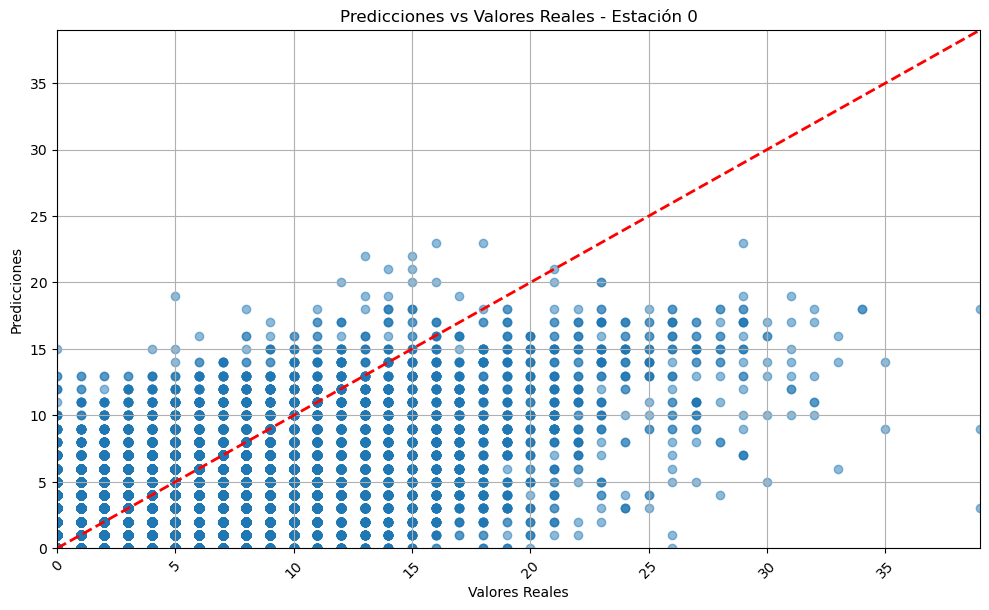

La media de los valores reales es: 1.0480037966069318
La media de las predicciones es: 0.8894168586858328


In [ ]:
importlib.reload(ent)
from entrenador_modelos import entrenador_modelos
from sklearn.ensemble import GradientBoostingRegressor
importlib.reload(grafs)
from graficos import graficar_pred_vs_real          

#Para un regresor definido, entrena los modelos y calcula las predicciones y métricas
regresor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=4, random_state=13)  # Cambia esto al regresor que quieras usar
model, proms_mae, proms_rmse, proms_mse, proms_r2, baseline_mae, baseline_mse, baseline_rmse, y_vals, predicciones = entrenador_modelos(regresor)

#Imprimo las metricas 
print("MAE Promedio:", np.mean(proms_mae))
print("RMSE Promedio:", np.mean(proms_rmse))
print("MSE Promedio:", np.mean(proms_mse))
print("R2 Promedio:", np.mean(proms_r2))

#Graficamos para una estacion especifica la prediccion vs el valor real
estacion_especifica = 5  # Cambia esto al número de la estación que quieras graficar
y_val = y_vals[estacion_especifica - 1]
y_pred = predicciones[estacion_especifica - 1]

y_vals_concat = pd.concat(y_vals, axis=0)

# Convert numpy arrays to pandas Series before concatenation
predicciones_series = [pd.Series(pred) for pred in predicciones]
predicciones_concat = pd.concat(predicciones_series, axis=0)

graficar_pred_vs_real(y_vals_concat, predicciones_concat, 0)


Procesando estación 1...
Predictions - Min: -0.40, Max: 7.40, Mean: 1.09
Predictions - Min: 0.00, Max: 7.40, Mean: 1.09
Procesando estación 2...
Predictions - Min: -0.72, Max: 10.17, Mean: 1.66
Predictions - Min: 0.00, Max: 10.17, Mean: 1.67
Procesando estación 3...
Predictions - Min: -0.31, Max: 9.83, Mean: 1.67
Predictions - Min: 0.00, Max: 9.83, Mean: 1.67
Procesando estación 4...
Predictions - Min: -1.85, Max: 18.61, Mean: 3.43
Predictions - Min: 0.00, Max: 18.61, Mean: 3.44
Procesando estación 5...
Predictions - Min: -0.42, Max: 8.57, Mean: 1.52
Predictions - Min: 0.00, Max: 8.57, Mean: 1.53
Procesando estación 6...
Predictions - Min: -0.13, Max: 1.93, Mean: 0.54
Predictions - Min: 0.00, Max: 1.93, Mean: 0.54
Procesando estación 7...
Predictions - Min: -0.71, Max: 12.72, Mean: 3.43
Predictions - Min: 0.00, Max: 12.72, Mean: 3.43
Procesando estación 8...
Predictions - Min: -1.00, Max: 13.26, Mean: 2.78
Predictions - Min: 0.00, Max: 13.26, Mean: 2.79
Procesando estación 9...
Predict

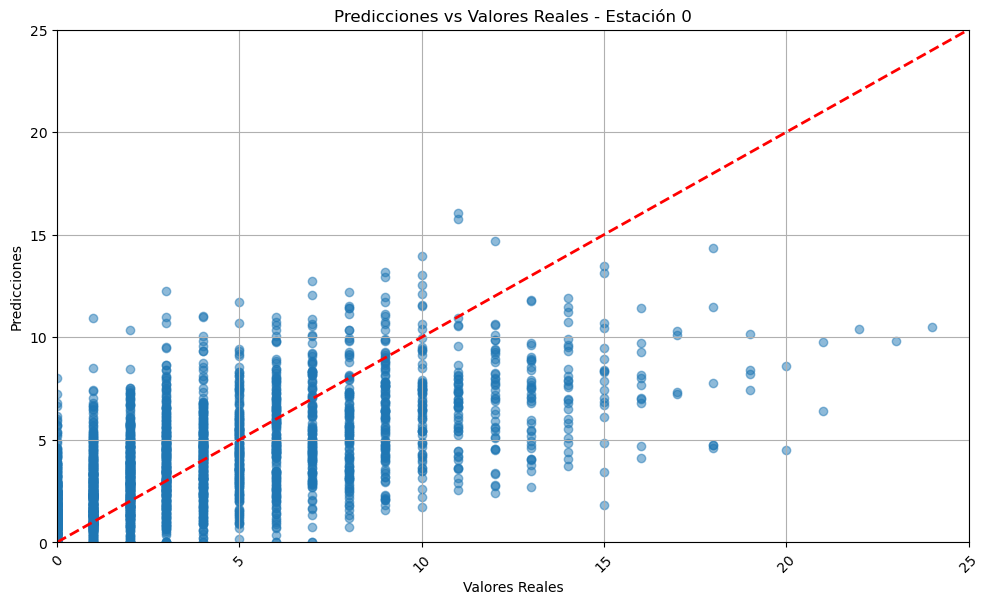

La media de los valores reales es: 4.091251885369532
La media de las predicciones es: 3.9823037744985577
MAE Estación Específica: 2.28347640036373
RMSE Estación Específica: 3.082761272577008
MSE Estación Específica: 9.503417063700613
R2 Estación Específica: 0.38263978868244464


In [41]:
importlib.reload(ent)
from entrenador_modelos import entrenador_modelos
from sklearn.linear_model import LinearRegression
importlib.reload(grafs)
from graficos import graficar_pred_vs_real

##### CON LINEAR REGRESSION #####

#Para un regresor definido, entrena los modelos y calcula las predicciones y métricas
regresor = LinearRegression()
model, proms_mae, proms_rmse, proms_mse, proms_r2, baseline_mae, baseline_mse, baseline_rmse, y_vals, predicciones = entrenador_modelos(regresor)

#Imprimo las metricas 
print("MAE Promedio:", np.mean(proms_mae))
print("RMSE Promedio:", np.mean(proms_rmse))
print("MSE Promedio:", np.mean(proms_mse))
print("R2 Promedio:", np.mean(proms_r2))


#Graficamos para una estacion especifica la prediccion vs el valor real
estacion_especifica = 11  # Cambia esto al número de la estación que quieras graficar
y_val = y_vals[estacion_especifica - 1]
print(y_val)
y_pred = predicciones[estacion_especifica - 1]

y_vals_concat = pd.concat(y_vals, axis=0)

# Convert numpy arrays to pandas Series before concatenation
predicciones_series = [pd.Series(pred) for pred in predicciones]
predicciones_concat = pd.concat(predicciones_series, axis=0)

graficar_pred_vs_real(y_val, y_pred, 0)

#Imprimo las metricas para la estacion especifica
print("MAE Estación Específica:", np.mean(np.abs(y_val - y_pred)))
print("RMSE Estación Específica:", np.sqrt(np.mean((y_val - y_pred) ** 2)))
print("MSE Estación Específica:", np.mean((y_val - y_pred) ** 2))
print("R2 Estación Específica:", 1 - (np.sum((y_val - y_pred) ** 2) / np.sum((y_val - np.mean(y_val)) ** 2)))



Largo del dataset de entrenamiento: 26394
Largo del dataset de validación: 2652
0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
2647    1.0
2648    2.0
2649    1.0
2650    2.0
2651    0.0
Name: target, Length: 2652, dtype: float64


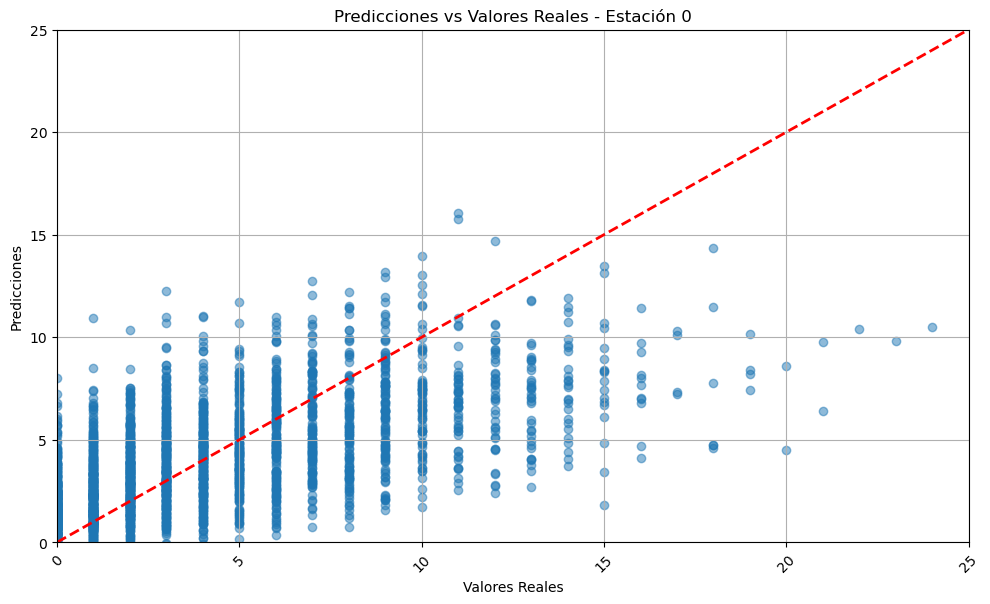

La media de los valores reales es: 4.091251885369532
La media de las predicciones es: 3.9789801986337823


In [38]:
#Prueba para el dataset 14
df_14 = pd.read_csv("/Users/isabelcastaneda/Desktop/Machine Learning Udesa/proyecto_final/BA_BICIS_MyC/data/processed/dataset_14_train.csv") # data/processed/dataset_14_train.csv
df_14_val = pd.read_csv("/Users/isabelcastaneda/Desktop/Machine Learning Udesa/proyecto_final/BA_BICIS_MyC/data/processed/dataset_14_val.csv") # data/processed/dataset_14_val.csv

#Imprimo el largo de los datasets
print("Largo del dataset de entrenamiento:", len(df_14))
print("Largo del dataset de validación:", len(df_14_val))

#Elimino las columnas

cols_to_drop = ['fecha_hora', 'fecha', 'año', 'id_estacion']
existing_cols = [col for col in cols_to_drop if col in df_14.columns]

if existing_cols:
    df_14.drop(columns=existing_cols, inplace=True)
    df_14_val.drop(columns=existing_cols, inplace=True)

    # Separar características y objetivo
    X_train = df_14.drop(columns=['target'])
    y_train = df_14['target']
    X_val = df_14_val.drop(columns=['target'])
    y_val = df_14_val['target']

print(y_val)
modelo = LinearRegression()
modelo.fit(X_train, y_train)
predicciones = modelo.predict(X_val)

# Graficar las predicciones vs los valores reales
graficar_pred_vs_real(y_val, predicciones, 0)
